<a href="https://colab.research.google.com/github/raffieeey/MasterResearchAutoML/blob/master/02A_H2OAutoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependecies for H2O automl

In [1]:
!pip install pmlb
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install pytictoc

  Created wheel for pmlb: filename=pmlb-0.3-cp36-none-any.whl size=11918 sha256=5a357c4345df996422a7a1705b005a422311de467c0b847e7733838e6f5794b2
  Stored in directory: /root/.cache/pip/wheels/5a/c7/a4/be59e63a2cb56f6c58f068305b95c212e0aac1a930fd77d6b0
Successfully built pmlb


In [0]:
#!pip uninstall h2o -y

Uninstalling h2o-3.26.0.2:
  Successfully uninstalled h2o-3.26.0.2


## Installing H2O

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 123.6MB 172kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.5-py2.py3-none-any.whl size=123672284 sha256=b60965ec944aae116d92b6d26d98c15f49f22ed4aded938f52f2867a5a8317a7
  Stored in directory: /root/.cache/pip/wheels/c9/d2/24/eeb5f07ff6826ea23325338cd3fb5754b99592a3f2b4e67f27
Successfully built h2o


##Starting H2O

In [0]:
import h2o

In [4]:
h2o.init(nthreads=2,
                 min_mem_size="2048M",
                 max_mem_size="2048M")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphezrzgkm
  JVM stdout: /tmp/tmphezrzgkm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphezrzgkm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.5
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_unknownUser_virr70
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [5]:
%matplotlib inline
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate","True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate","True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall","Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = (np.sum(labels)/len(labels))[0]
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall","Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

figure()

<Figure size 648x324 with 0 Axes>

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score , log_loss
import numpy as np

def acc(truth, predictions):
        return float(accuracy_score(truth, predictions))

def auc(truth, predictions):
        return float(roc_auc_score(truth, np.max(predictions.iloc[:,1:], axis=1)))

def logloss(truth, predictions):
        return float(log_loss(truth, np.max(predictions.iloc[:,1:], axis=1)))

________________________________________________________________________________
*** Dataset Name: adult ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 62.080076 seconds.
*** Top 5 algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190918_065112,0.921289,0.299269,0.22054,0.304149,0.0925067



xgboost prediction progress: |████████████████████████████████████████████| 100%


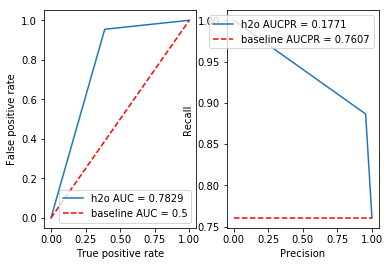

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 65.055109 seconds.
*** Top 5 algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_2_AutoML_20190918_065216,1,0.0276882,0,0.0312407,0.000975979
StackedEnsemble_AllModels_AutoML_20190918_065216,1,0.00146358,0,0.00505005,2.5503e-05
XGBoost_1_AutoML_20190918_065216,1,0.0211753,0,0.0370433,0.00137221
StackedEnsemble_BestOfFamily_AutoML_20190918_065216,1,0.00198669,0,0.00455818,2.0777e-05
GBM_1_AutoML_20190918_065216,1,0.0270824,0,0.0292845,0.000857581



gbm prediction progress: |████████████████████████████████████████████████| 100%


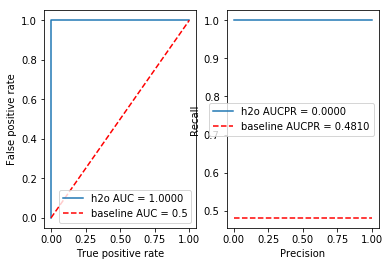

________________________________________________________________________________
*** Dataset Name: churn ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 63.249606 seconds.
*** Top 5 algorithm: *** 

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20190918_065323,0.920028,0.159413,0.0997353,0.192539,0.0370714
StackedEnsemble_BestOfFamily_AutoML_20190918_065323,0.917157,0.139533,0.0997549,0.182737,0.0333927
StackedEnsemble_AllModels_AutoML_20190918_065323,0.91645,0.138705,0.100939,0.182171,0.0331862
GBM_3_AutoML_20190918_065323,0.924024,0.149247,0.106174,0.186926,0.0349413
DRF_1_AutoML_20190918_065323,0.917876,0.327322,0.10694,0.206446,0.04262



xgboost prediction progress: |████████████████████████████████████████████| 100%


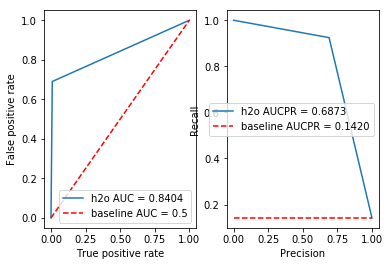

________________________________________________________________________________
*** Dataset Name: nursery ***
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Elapsed time is 62.155702 seconds.
*** Top algorithm: *** 

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_1_AutoML_20190918_065428,0.0582827,0.12034,0.157675,0.0248614



xgboost prediction progress: |████████████████████████████████████████████| 100%


ValueError: ignored

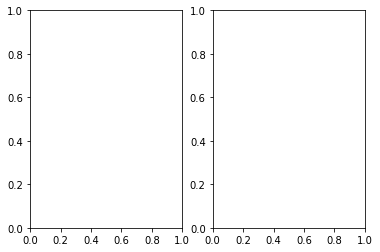

In [10]:
from pmlb import classification_dataset_names, regression_dataset_names,fetch_data
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from pytictoc import TicToc


preds = {}
score_preds = {}
t = TicToc()

sel_clss_dtst = ['adult','agaricus-lepiota', 'churn', 'nursery', 'satimage','texture']
sel_rgrs_dtst = ['294_satellite_image','218_house_8L', '227_cpu_small', '503_wind', '344_mv','215_2dplanes']

for metrics_test in  ['mean_per_class_error', 'AUC', 'logloss']:
  for class_dtst in sel_clss_dtst:
      if class_dtst in ("nursery", "satimage", "texture") and metrics_test in  ['mean_per_class_error', 'logloss'] : #For rank/non-binary classification data
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        X, y = fetch_data(class_dtst, return_X_y=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = h2o.H2OFrame(X_train)
        X_test = h2o.H2OFrame(X_test)
        y_train = h2o.H2OFrame(y_train).asfactor()
        y_test = h2o.H2OFrame(y_test).asfactor()
        aml = H2OAutoML(seed=69, max_runtime_secs=60,sort_metric=metrics_test)
        t.tic()
        aml.train(x=X_train.columns, y=X_train.cbind(y_train)[:,-1].columns[0], training_frame=X_train.cbind(y_train))
        t.toc()    
        lb = aml.leaderboard
        print("*** Top algorithm: ***", lb.head(5))
        preds[class_dtst] = aml.leader.predict(X_test).as_data_frame()
        #prediction_summary( y_test.as_data_frame(), preds[class_dtst].iloc[:,0], "h2o")
        if metrics_test == 'mean_per_class_error':
      acc(truth, predictions):



      elif class_dtst not in ("nursery", "satimage", "texture") and metrics_test in  ['mean_per_class_error', 'AUC'] : #For binary classification data
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        X, y = fetch_data(class_dtst, return_X_y=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = h2o.H2OFrame(X_train)
        X_test = h2o.H2OFrame(X_test)
        y_train = h2o.H2OFrame(y_train).asfactor()
        y_test = h2o.H2OFrame(y_test).asfactor()
        aml = H2OAutoML(seed=69, max_runtime_secs=60,sort_metric=metrics_test)
        t.tic()
        aml.train(x=X_train.columns, y=X_train.cbind(y_train)[:,-1].columns[0], training_frame=X_train.cbind(y_train))
        t.toc()    
        lb = aml.leaderboard
        print("*** Top algorithm: ***", lb.head(5))
        preds[class_dtst] = aml.leader.predict(X_test).as_data_frame()
        prediction_summary( y_test.as_data_frame(), preds[class_dtst].iloc[:,0], "h2o")

In [18]:
np.max(preds['nursery'].iloc[:,1:], axis=1)

0       0.567654
1       0.978929
2       0.980671
3       0.893168
4       0.846555
5       0.986398
6       0.965499
7       0.799209
8       0.946575
9       0.979404
10      0.673100
11      0.911560
12      0.982237
13      0.761678
14      0.941966
15      0.919045
16      0.978701
17      0.596010
18      0.944259
19      0.981063
20      0.980282
21      0.938716
22      0.979809
23      0.816034
24      0.845121
25      0.980545
26      0.981201
27      0.847741
28      0.979344
29      0.979930
          ...   
1266    0.977145
1267    0.954127
1268    0.953903
1269    0.838168
1270    0.911758
1271    0.934535
1272    0.776918
1273    0.978118
1274    0.765211
1275    0.953496
1276    0.554882
1277    0.949693
1278    0.948923
1279    0.682126
1280    0.619087
1281    0.978321
1282    0.878301
1283    0.961342
1284    0.980576
1285    0.953832
1286    0.965008
1287    0.926417
1288    0.981348
1289    0.962626
1290    0.978623
1291    0.978211
1292    0.554608
1293    0.8448

In [19]:
preds['nursery'].iloc[:,1:]

,p0,p1,p3,p4
0,0.026653,0.345048,0.567654,0.060645
1,0.978929,0.003959,0.013972,0.003140
2,0.980671,0.007117,0.008915,0.003296
3,0.015715,0.081953,0.893168,0.009164
4,0.020956,0.118277,0.846555,0.014212
5,0.004968,0.005773,0.986398,0.002861
6,0.009487,0.965499,0.016841,0.008173
7,0.017696,0.799209,0.141732,0.041362
8,0.011059,0.035876,0.946575,0.006490
9,0.979404,0.007134,0.003540,0.009922
